In [1]:
!pip install pandas

In [3]:
import pandas as pd
print(pd.__version__)

2.2.2


In [4]:
!pip install numpy

In [11]:
df = pd.read_csv("C:\\Users\\kondu\\Downloads\\expenses.csv")
df.head(5)
df.drop(columns=['sex', 'region'], inplace=True)
df.head()



,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [12]:
df.isnull().sum()

age         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


In [25]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})

missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage


outliers


In [34]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['age', 'bmi', 'children', 'charges'], dtype='object')


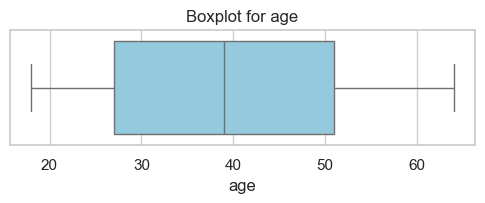

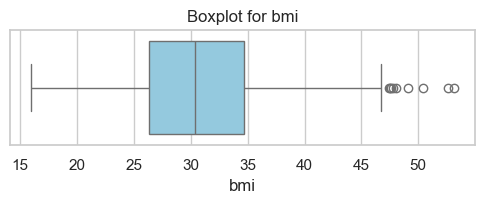

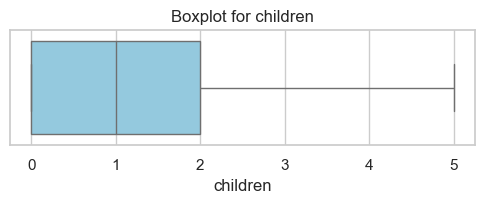

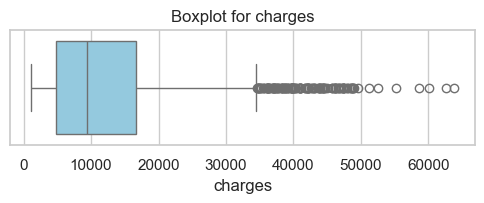

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.show()


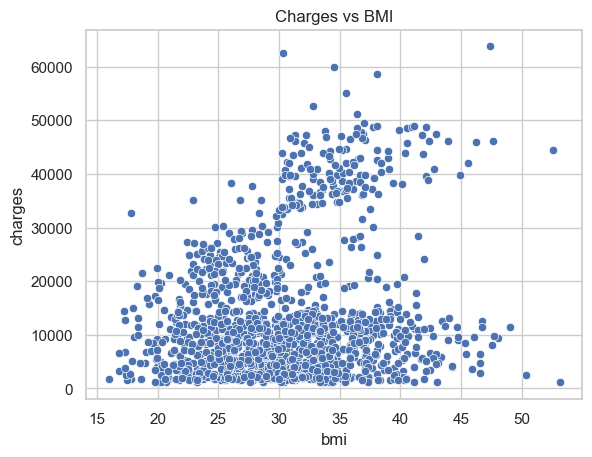

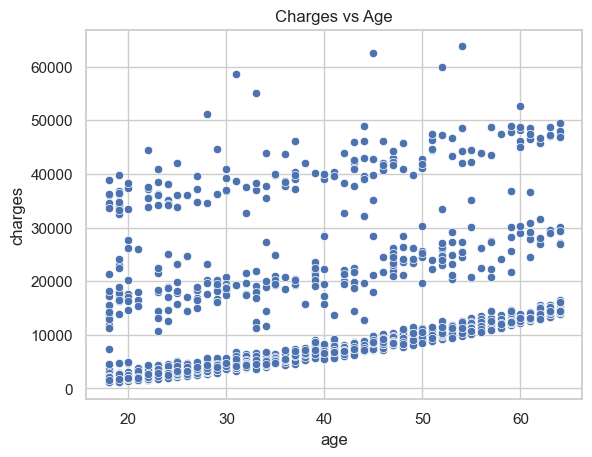

In [31]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("Charges vs BMI")
plt.show()

sns.scatterplot(x='age', y='charges', data=df)
plt.title("Charges vs Age")
plt.show()


In [39]:
df_clean = df.copy()

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]


In [41]:
print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)
print("Rows removed  :", df.shape[0] - df_clean.shape[0])

Original shape: (1338, 5)
After removing outliers: (1191, 5)
Rows removed  : 147


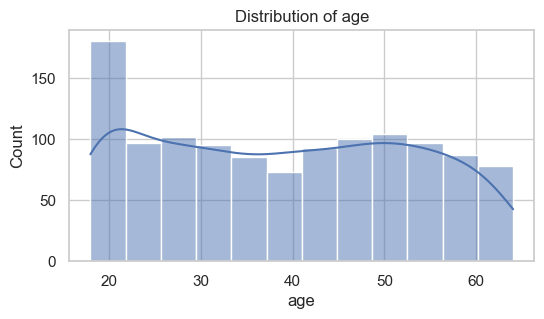

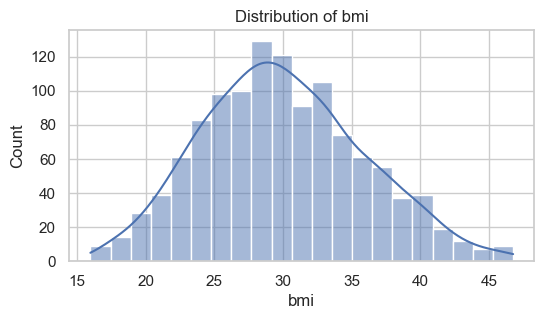

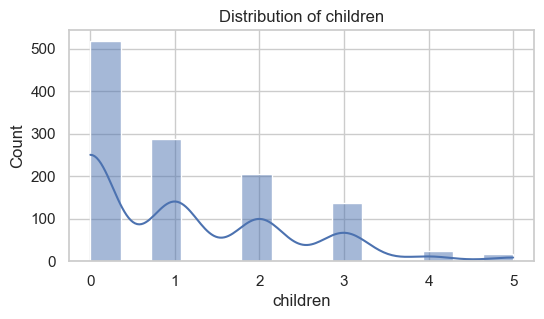

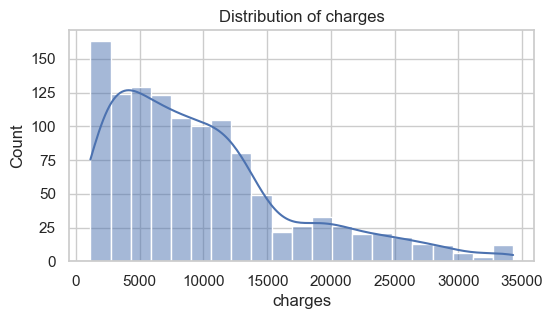

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



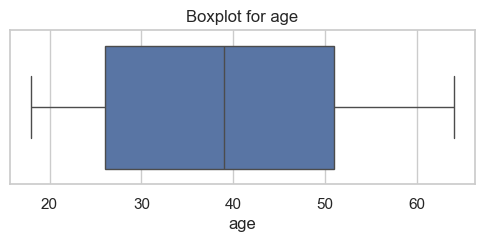

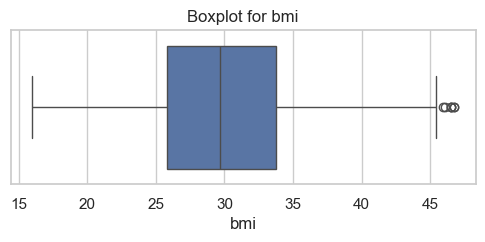

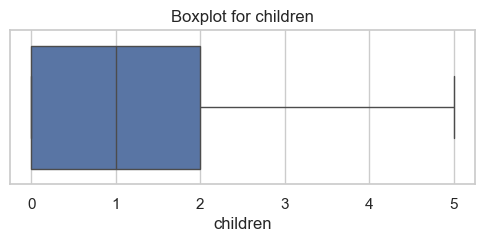

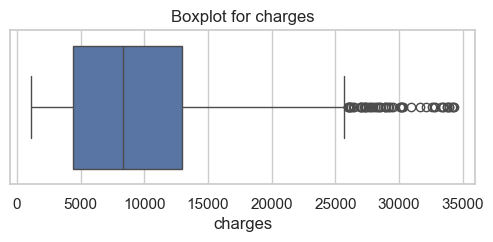

In [44]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


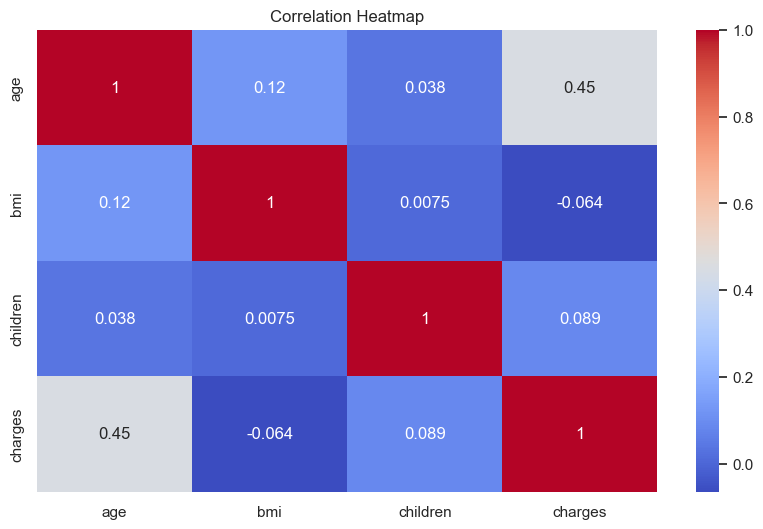

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


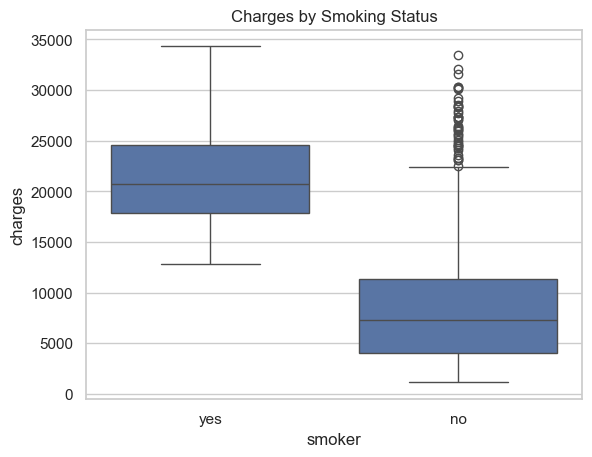

In [46]:
sns.boxplot(data=df_clean, x='smoker', y='charges')
plt.title("Charges by Smoking Status")
plt.show()


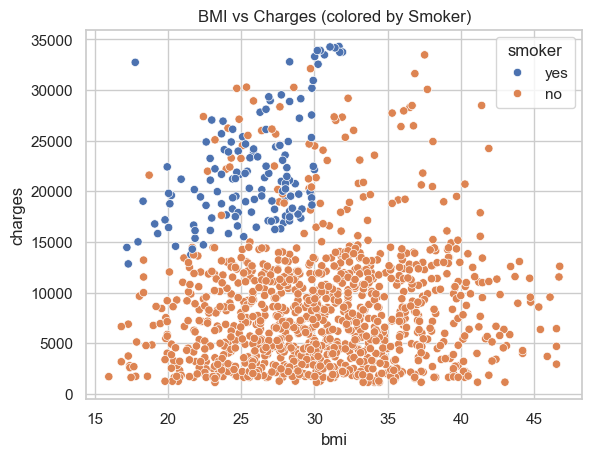

In [47]:
sns.scatterplot(data=df_clean, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges (colored by Smoker)")
plt.show()
